In [19]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def histogram_equalization(image, nbr_bins=256):
    if image.mode != 'L':
        image = image.convert('L')
    
    image_array = np.array(image)

    histogram, bins = np.histogram(image_array, bins=nbr_bins, range=(0, 256), density=True)

    cdf = histogram.cumsum()
    cdf = 255 * cdf / cdf[-1]

    image_equalized = np.interp(image_array, bins[:-1], cdf)
    equalized_image = Image.fromarray(image_equalized.astype('uint8'))

    return equalized_image

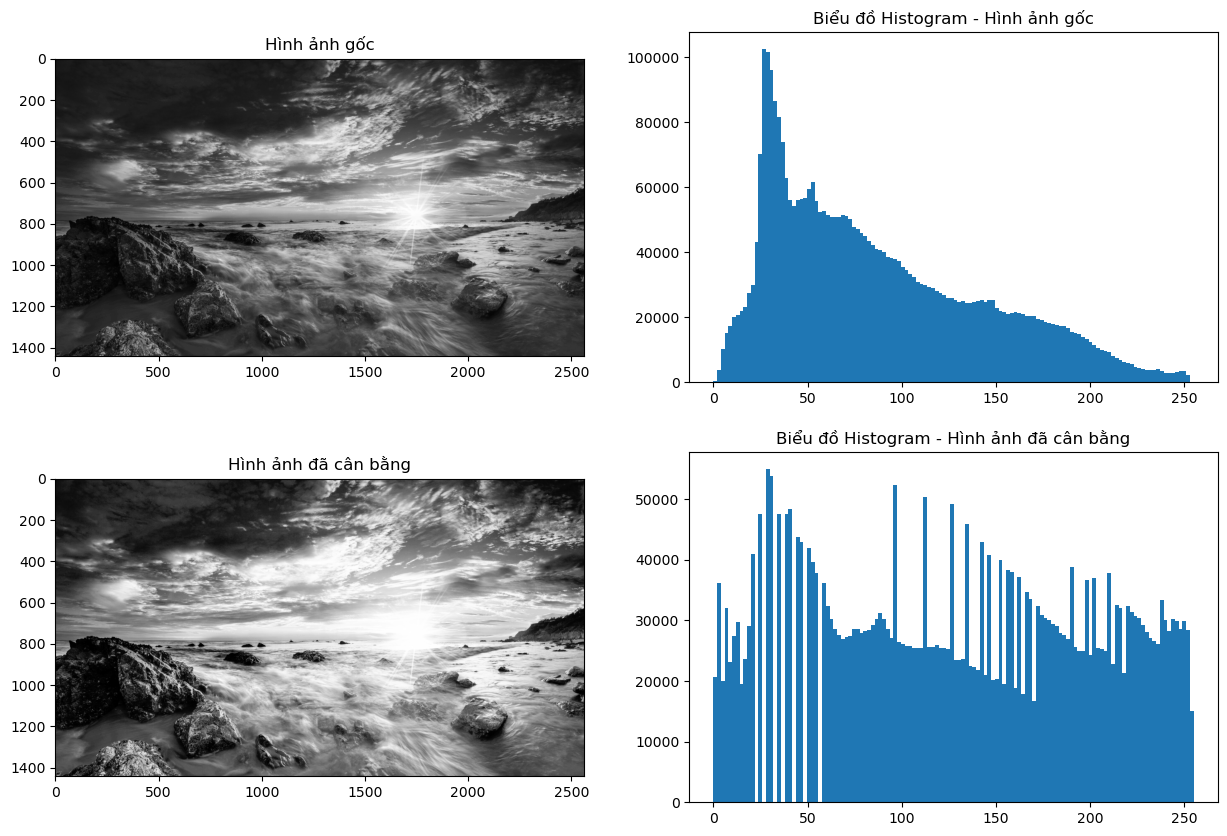

In [20]:
my_path = 'C:/Thigiacmaytinh/2.jpg'
img = Image.open(my_path)
equalized_img = histogram_equalization(img)
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(img.convert("L"), cmap='gray')
plt.title('Hình ảnh gốc')
plt.subplot(2, 2, 2)
plt.hist(np.array(img.convert("L")).flatten(), bins=128)
plt.title('Biểu đồ Histogram - Hình ảnh gốc')
plt.subplot(2, 2, 3)
plt.imshow(equalized_img, cmap='gray')
plt.title('Hình ảnh đã cân bằng')
plt.subplot(2, 2, 4)
plt.hist(np.array(equalized_img).flatten(), bins=128)
plt.title('Biểu đồ Histogram - Hình ảnh đã cân bằng')

plt.show()